# Preprocesamiento de imágenes

Definimos el **preprocesamiento de imágenes** como el conjunto de técnicas y/o operaciones que se aplican a las imágenes almacenadas en un ordenador para que éstas puedan ser utilizadas por los algoritmos de *machine learning*.

En el ámbito de la informática, cualquier imagen, por compleja que sea, está siempre compuesta por pixeles. Los píxeles se agrupan formando una matriz bidimensional que define el tamaño de la imagen. Cuantas más filas y columnas tengan esa matriz, más resolución tendrá la imagen. A continuación, se muestra una imagen de 55x55 píxeles:

![Imagen pixelada](https://drive.google.com/uc?export=view&id=1B6Z7foIjSYXdu2INvBlmxht3ou65h_N2)

Cuando se trabaja con imágenes, generalmente, se distinguen dos tipos de imágenes: las imágenes en blanco y negro (o escala de grises) y las imágenes a color. Las primeras definen el color de cada uno de sus pixeles mediante un número de 0 a 255 que indica la cantidad de blanco que posee dicho píxel: el valor 0 se corresponden con la ausencia de blanco (negro) y el valor 255 se corresponde con el blanco total. Los valores intermedios permiten definir los diferentes tonos de gris existentes. Esta sería la imagen anterior en escala de grises:

![Imagen pixelada en escala de grises](https://drive.google.com/uc?export=view&id=1oLBS16EEwI5opnKiXCXkaPfG3vqkWsP0)

Por su parte, las segundas consiguen generar el color mediante la adición de tres componentes lumínicos: el componente rojo, el componente azul y el componente verde. Es por esto por lo que a estas imágenes se las conoce como RGB (del inglés, *Red-Green-Blue*). Mediante la combinación de estos tres componentes puede conseguirse representar cualquier color. Por tanto, cuando definamos una imagen en color, cada píxel vendrá definido por tres valores: la cantidad de rojo, la cantidad de verde y la cantidad de azul de píxel. Todos ellos, al igual que las imágenes en escala de grises, vendrán definidos con un valor numérico de 0 a 255, siendo 0 la ausencia del componente y 255 la totalidad del componente. Las siguientes imágenes muestran la imagen original separando cada uno de sus canales de RGB:

![Imagen pixelada separa por componentes RGB](https://drive.google.com/uc?export=view&id=1lSeyP8Otwlzv-MdnjVbC-LW_HWBLAGNM)

Dada esta representación computacional de las imágenes, la idea general del preprocesamiento de datos es sencilla: transformar una colección de píxeles en un *array* unidimensional que contenga toda la información contenida en la imagen.


## Trasformación básica

En este apartado vamos a estudiar el concepto fundamental en el que radica la trasformación de imágenes. 

Como es lógico, el tipo de imágen más sencillo con el que podemos trabajar es una imágen en escala de grises. Supongamos, por tanto, que tenemos la siguiente imagen de 4x4 píxeles:

In [ ]:
import numpy as np
img = np.array([[0,0,0,0],[0,255,255,0],[0,255,255,0],[0,0,0,0]], dtype=np.uint8)

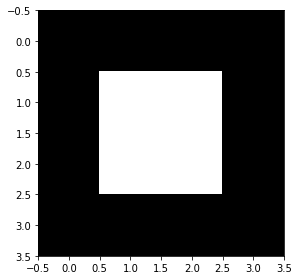

In [ ]:
from skimage import io
io.imshow(img)

Como podemos observar, la imagen se ha definido en un *array* de dos dimensiones compuesto por 4 filas y 4 columnas.

In [ ]:
img.shape

(4, 4)

Esta representación de las imágenes no es válida para ser utilizada por los algoritmos de *machine learning*, ya que éstos requieren que sus datos de entrada estén almacenados en *arrays* unidimensionales.

Por tanto, lo que debemos hacer es transformar el *array* bidimensional en un array unidimensional de tal manera que, una imagen representada en una matriz de *N* filas y *M* columnas pase a ser un *array* de dimensión *NxM*.

Para ello hacemos uso del método `ravel()` de la clase `numpy`:

In [ ]:
img.ravel()

array([  0,   0,   0,   0,   0, 255, 255,   0,   0, 255, 255,   0,   0,
         0,   0,   0], dtype=uint8)

Podemos observar que las primeras cuatro posiciones se corresponden con la primera fila, las segundas cuatro posiciones se corresponden con la segunda fila y así sucesivamente.

Este es el formato más habitual en el que encontraremos las imágenes en los diferentes conjuntos de datos que utilicemos. El problema que tenemos es que, si queremos analizar visualmente estas imágenes, no podemos, por lo que tenemos que volver a transformarlas a una estructura bidimensional mediante `reshape()`.

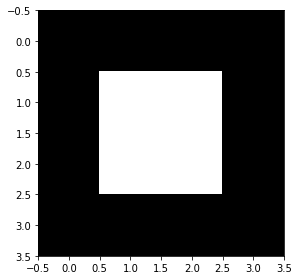

In [ ]:
img_1d = img.ravel()
io.imshow(img_1d.reshape([4,4]))

## Imágenes a color

Generalmente, trabajar con imágenes en blanco y negro es suficiente para obtener una información representativa sobre el contenido de la imagen. Trabajar con imágenes en blanco y negro en lugar de imágenes a color tiene un gran ventaja: ocupan menos espacio.

Que las imágenes ocupen menos espacio significa que:

- Su consumo de memoria es más pequeño
- La dimensionalidad del conjunto de datos es más reducida

Ambas son condiciones deseables en todo algoritmo de *machine learning*.

Sin embargo, existen situaciones en las que el color es importante. Supongamos que disponemos de la siguiente imagen de una señal de tráfico que limita la velocidad a 40 km/h:

![Límte 40km/h](https://drive.google.com/uc?export=view&id=1QUjtvI8VIai5mt1n40qcVbFWnqbcUIzR)

Ahora, disponemos de la misma imagen, pero para limitar la velocidad en un tramo de obras:

![Límte 40km/h obras](https://drive.google.com/uc?export=view&id=1FuUwQeqjj2Uugo7yrCh3dksFsO9EiJBv)

¿Qué sucede si ponemos ambas imágenes en blanco y negro?

![Límte 40km/h blacno y negro](https://drive.google.com/uc?export=view&id=1JyHcXraBFYNSXgYQDXSRWs0NCioeSg-X)

Cuesta distinguir, a simple vista, ambas señales.

La definición de imágenes en color se logra mediante *arrays* de 3 dimensiones en los que las dos primera posiciones representan el píxel al que se hace referencia y la tercera reasenta el canal de color en el que se está marcando la intensidad de dicho píxel.

**Ejercicio:** genera manualmente una imagen a color, muéstrala con `io.imshow()` y transformalá en un vector unidimensional.

Existen otras muchas formas de representar el color y podemos convertirlas fácilmente con la librería `scikit-image`. Algunos de los métodos incluidos son:

- [Conversión entre modelos de color](https://scikit-image.org/docs/stable/user_guide/transforming_image_data.html#conversion-between-color-models)
- [RGBA a RGB](https://scikit-image.org/docs/stable/user_guide/transforming_image_data.html#conversion-from-rgba-to-rgb-removing-alpha-channel-through-alpha-blending)
- [Color y escala de grises](https://scikit-image.org/docs/stable/user_guide/transforming_image_data.html#conversion-between-color-and-gray-values)
- [Inversión de colores](https://scikit-image.org/docs/stable/user_guide/transforming_image_data.html#image-inversion)

En general, tenemos muchos métodos de trasformación de colores en [`skimage-colors`](https://scikit-image.org/docs/stable/api/skimage.color.html).


## Máscaras

¿Son todos los píxeles de una imagen igual de importantes? Parece lógico pensar que no. Cuando se toma una fotografía la zona de interés suele estar en el centro de la misma, siendo las esquinas desde el punto de visto de la información de la fotografía.

Algunos ejemplos tomados de *lorem picsum*:

![Ejemplo 1](https://picsum.photos/id/1011/200)
![Ejemplo 2](https://picsum.photos/id/237/200)
![Ejemplo 3](https://picsum.photos/id/106/200)

Añadir píxeles innecesarios a una imagen dificulta enormemente el aprendizaje a los algoritmos de *machine learning*. Una de las técnicas más utilizadas para eliminar esta información consiste en aplicar máscaras sobre las imágenes de tal manera que todos los píxeles que queden fuera de la máscara se fijen a un color predefinido (generalmente negro) y sean "ignorados" por los algoritmos de *machine learning*.

Veamos algunos ejemplos usando la siguiente fotografía como referencia:

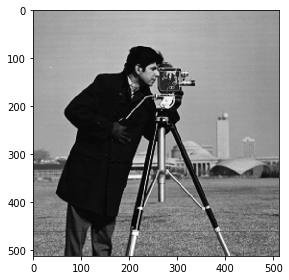

In [ ]:
from skimage import data
camera = data.camera()
io.imshow(camera)

Ponemos a negro las 20 primeras filas:

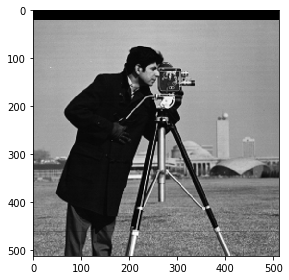

In [ ]:
camera = data.camera()
camera[:20] = 0
io.imshow(camera)

Ponemos a blanco todos los píxles que tengan una intensidad inferior a 87:

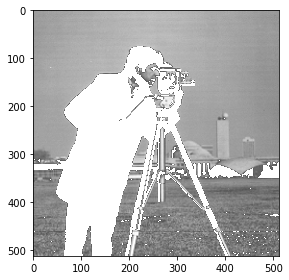

In [ ]:
camera = data.camera()
mask = camera < 87
camera[mask] = 255
io.imshow(camera)

Ponemos en negro todos los píxeles que no pertenezcan a la circunferencia interior de la imagen:

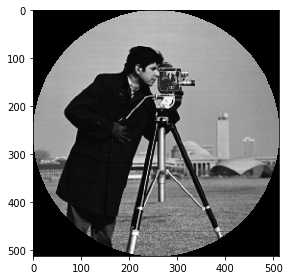

In [ ]:
camera = data.camera()
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
camera[outer_disk_mask] = 0
io.imshow(camera)

**Ejercicio:** crea una máscara que elimine 25 píxles del exterior de una imagen. 

## scikit-image

`scikit-image` es una de las librerías de referencia para trabajar con imágenes en python. 

Como hemos visto, `scikit-image` opera con imágenes codificadas en *arrays* de `numpy`. Se permiten los siguientes tipos de datos:

| Tipo de datos        	| Rango             	|
|---------------------	|-------------------	|
| uint8               	| 0 to 255          	|
| uint16                | 0 to 65535         	|
| uint32 	              | 0 to 2^32 - 1      	|
| float               	| -1 to 1 or 0 to 1 	|
| int8                	| -128 to 127       	|
| int16               	| -32768 to 32767   	|
| int32               	| -2^31 to 2^31 - 1 	|

Además, admite conversiones entre tipos utilizando los métodos del submódulo [`skimage.util`](https://scikit-image.org/docs/stable/api/skimage.util.html):

* `img_as_float`
* `img_as_ubyte`
* `img_as_uint`
* `img_as_int`

Por otro lado, `scikit-image` incorpora diversas imágenes de ejemplo con las que podemos "jugar" en el módulo [`skimage.data`](https://scikit-image.org/docs/stable/api/skimage.data.html).

**Ejercicio:** prueba a convertir la imagen del cohete (*rocket*) a distintos tipos y el contenido de los arrays y la visualización de los mismos.

## Ajuste de contraste y exposición

Durante el procesamiento de imágenes es probable que nos encontremos con fotografías que ha sido tomadas en condiciones lumínicas no ideales o con una configuración inadecuada de la lente. Esto suele traducirse en imágenes en las que resulta complicado extraer información. Mediante el ajuste del contraste y la exposición de una imagen podemos enfatizar los elementos más significativos de la misma para que le sea más sencillo al algoritmo de *machine learning* extraer información sobre ella.

El módulo [`skimage.exposure`](https://scikit-image.org/docs/stable/api/skimage.exposure.html) contiene mucho métodos para preprocesar las imágenes.

In [ ]:
from skimage import exposure

Vamos a comparar diferentes transformaciones sobre la siguiente imagen:

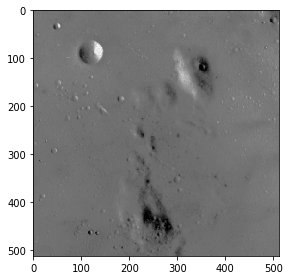

In [ ]:
moon = data.moon()
io.imshow(moon)

Una de las técnicas más populares es la [corrección del gamma](https://en.wikipedia.org/wiki/Gamma_correction):

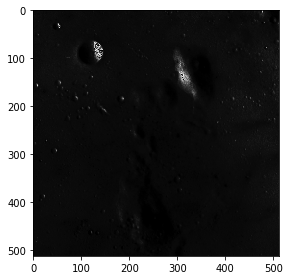

In [ ]:
moon = data.moon()
gamma = 5.9 #@param {type: "slider", min:0, max:10, step:0.1}
gain = 5.1 #@param {type: "slider", min:0, max:10, step:0.1}
io.imshow(exposure.adjust_gamma(moon, gamma, gain))

En definitiva, casi todas las transformaciones que hagamos, se basan en el histograma de la imagen:

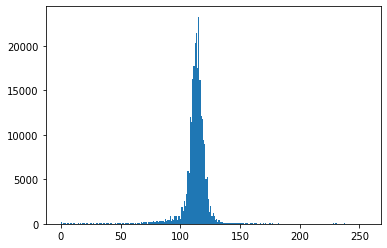

In [ ]:
import matplotlib.pyplot as plt
_ = plt.hist(moon.ravel(), bins=255)

In [ ]:
exposure.histogram(moon)

(array([  240,     0,    60,    36,     0,    60,    52,     0,    52,
            0,    60,    80,     0,     4,    44,     0,    56,     0,
           88,    72,     0,    80,    76,     0,    52,    68,     0,
           64,     0,    88,    80,     0,    72,    40,     0,    72,
           36,     0,    48,    64,     0,    64,    48,     0,    28,
           76,     0,    84,    76,    88,     0,    80,   108,     0,
           52,    76,    92,     0,    88,   100,   100,     0,   104,
            0,   132,   108,     0,   148,   124,   168,   160,   160,
            0,   212,   208,   180,   200,   264,   216,   220,   312,
          224,   272,   296,   284,   316,   252,   536,   368,   408,
          372,   824,   352,   596,   456,   860,   916,   400,   880,
          908,   580,  1860,  1416,  2564,  2036,  3392,  5928,  5724,
        11964, 11436, 16256, 17772, 20324, 21444, 17484, 23296, 16144,
        12096, 11748,  9408,  9020,  5080,  5316,  2776,  1364,  2056,
      

Una de las formas de ajustar el contraste es reescalar los píxeles al mínimo y máximo permitido (0 y 255 generalmente). Esto podemos hacerlo usando `rescale_intensity()`. Sin embargo, en el ejemplo de la luna, no tiene sentido:

In [ ]:
moon.min(), moon.max()

(0, 255)

No obstante, el método es parametrizable y podemos ajustar la imagen al rango que queramos:

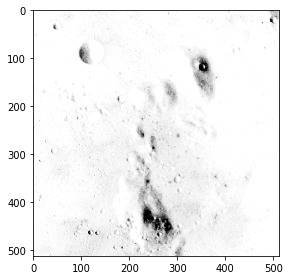

In [ ]:
min = 10  #@param {type: "slider", min: 0, max: 255}
max = 114  #@param {type: "slider", min: 0, max: 255}
io.imshow(exposure.rescale_intensity(moon, in_range=(min, max)))

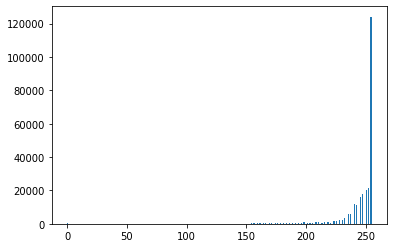

In [ ]:
_ = plt.hist(exposure.rescale_intensity(moon, in_range=(min, max)).ravel(), bins=255)

Es habitual que los valores de reescalado se identifiquen mediante los percentiles:

In [ ]:
p_min, p_max = np.percentile(moon, (20, 80))
p_min, p_max

(109.0, 118.0)

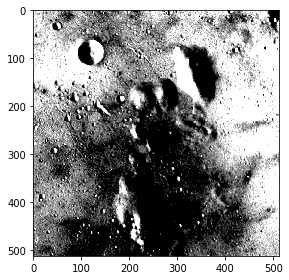

In [ ]:
io.imshow(exposure.rescale_intensity(moon, in_range=(p_min, p_max)))

También es frecuente igualar los histogramas a una fotografía que actua como referente mediante la función [`match_histograms`](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.match_histograms). De este modo, podemos centrarnos en ajustar correctamente el histograma de una única fotografía y luego hacer que todas las fotografías se ajusten a la misma. Visualmente, si trabajamos con imágenes a color, conseguirmos que todas las dos imágenes tengan tonalidades de color similares como se muestra en este ejemplo:

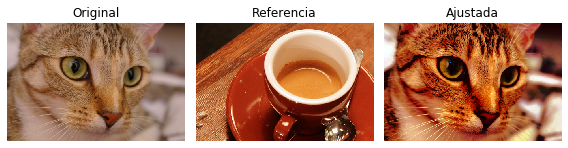

In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(reference)
ax2.set_title('Referencia')
ax3.imshow(matched)
ax3.set_title('Ajustada')

plt.tight_layout()
plt.show()

**Ejercicio:** analiza el resto de métodos del módulo `skimage.exposure` ([https://scikit-image.org/docs/stable/api/skimage.exposure.html#module-skimage.exposure](https://scikit-image.org/docs/stable/api/skimage.exposure.html#module-skimage.exposure)). ¿Qué hacen?

## Filtros

El principal objetivo de los algoritmos de *machine learning* en encontrar pautas o patrones en los datos de entrada con el objetivo de darles un **valor añadido**. Para ello, es fundamental que alimentemos al algoritmo con los datos "en crudo". Dicho de otro modo, tenemos que evitar sesgar los datos de entrada porque, en ese caso, estaremos condicionando la salida del algoritmo.

No obstante, dejar los datos en "en crudo" tiene un problema asociado: el espacio de búsqueda de las soluciones es mayor y, por ende, es más difícil que nuestro algoritmo aprenda. Es por ello por lo que, en algunas ocasiones, conviene aplicar algunas trasformaciones a los datos de entrada que orienten a nuestro algoritmo de *machine learning* hacia la solución al problema que queremos resolver.

Cuando trabajamos con imágenes, podemos aplicar filtros a las mismas para facilitar la identificación de la información que contienen.

Vamos a ver algunos de los filtros contenidos en [`skimage.filters`](https://scikit-image.org/docs/stable/api/skimage.filters.html) usando como ejemplo la imagen del astronauta.

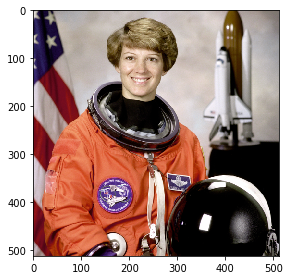

In [ ]:
astronaut = data.astronaut()
io.imshow(astronaut)

La mayoría de filtros estan preparados para trabajar en escala de grises, por lo que convertimos nuestra imagen:

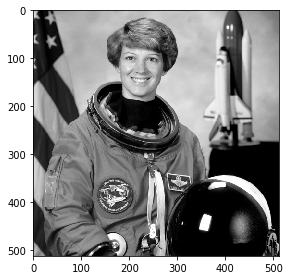

In [ ]:
from skimage.color import rgb2gray
astronaut = rgb2gray(astronaut)
io.imshow(astronaut)

Cargamos el módulo:

In [ ]:
from skimage import filters

El filtro [`gaussian`](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian) permite desenfocar las imágenes:

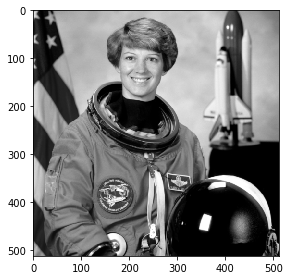

In [ ]:
sigma = 0.5  #@param {type: "slider", min: 0, max: 10, step:0.5}
io.imshow(filters.gaussian(astronaut, sigma=sigma))

El filtro [`unsharp_mask`](https://scikit-image.org/docs/stable/api/skimage.filters.html#unsharp-mask) permite resaltar los bordes de la imagen y desenfocar las zonas sin bordes:

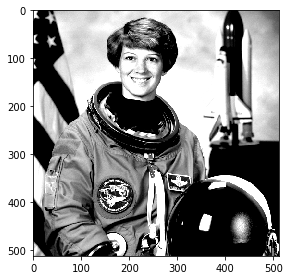

In [ ]:
radius = 98.5  #@param {type:"slider", min:0.5, max:100, step:0.5}
io.imshow(filters.unsharp_mask(astronaut, radius=radius))

El filtro [`median`](https://scikit-image.org/docs/stable/api/skimage.filters.html#median) "aplana" una imagen calculando el valor medio local de cada pixel:

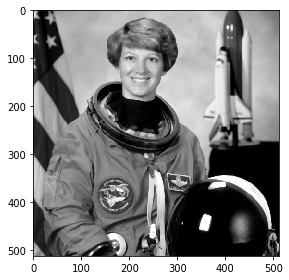

In [ ]:
io.imshow(filters.median(astronaut))

Otra tendencia habitual es binarizar los datos de tal forma que cada píxel tome el valor blanco o negro. Para ello, se establece un umbral (*threshold*) a patir del cual el píxel se asume como fondo o no. Existen diferentes algoritmos para determinar el umbral y podemos ver sus diferencias con [`try_all_threshold`](https://scikit-image.org/docs/stable/api/skimage.filters.html#try-all-threshold):

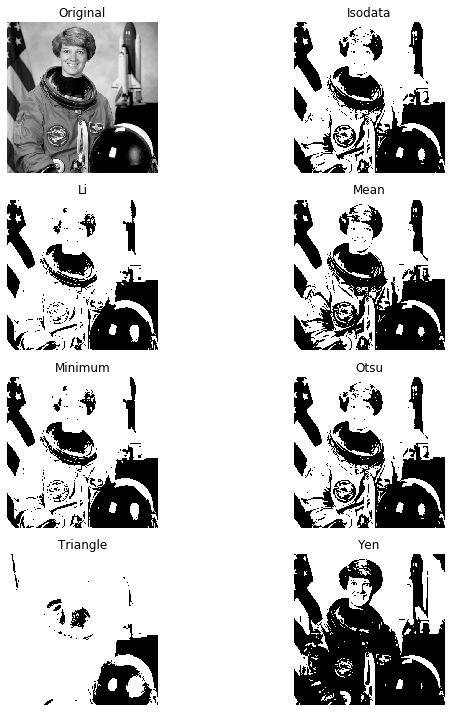

In [ ]:
fig, ax = filters.try_all_threshold(astronaut, figsize=(10, 10), verbose=False)

Tambien eshabitual centrarse en los bordes de las imágenes, ya que estos, a menudo, contienen la mayor parte de la información de las mismas. Existen infinidad de algoritmos para identificar los bordes. A continuación, algunos ejemplos.

- [`sobel`](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.sobel):

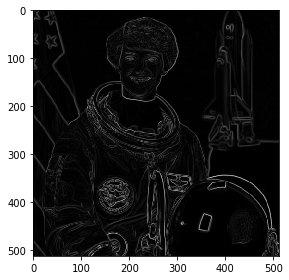

In [ ]:
io.imshow(filters.sobel(astronaut))

- [`scharr`](https://scikit-image.org/docs/stable/api/skimage.filters.html#scharr):

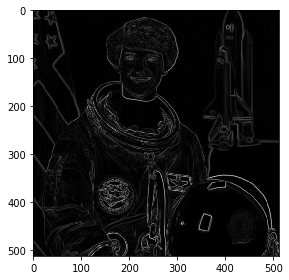

In [ ]:
io.imshow(filters.scharr(astronaut))

- [`prewitt`](https://scikit-image.org/docs/stable/api/skimage.filters.html#prewitt):

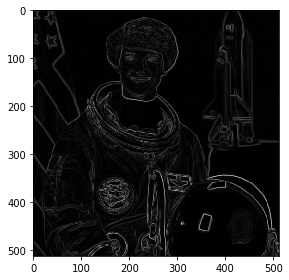

In [ ]:
io.imshow(filters.prewitt(astronaut))

- [`roberts`](https://scikit-image.org/docs/stable/api/skimage.filters.html#roberts):

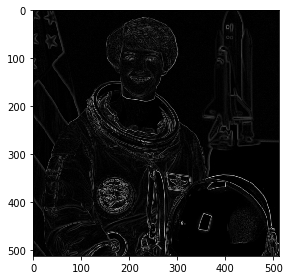

In [ ]:
io.imshow(filters.roberts(astronaut))

- [`laplace`](https://scikit-image.org/docs/stable/api/skimage.filters.html#laplace):

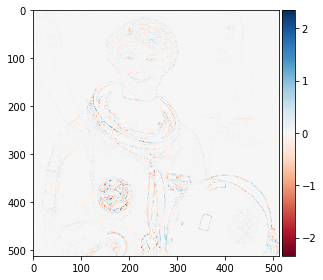

In [ ]:
io.imshow(filters.laplace(astronaut))

- [`frangi`](https://scikit-image.org/docs/stable/api/skimage.filters.html#frangi):

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


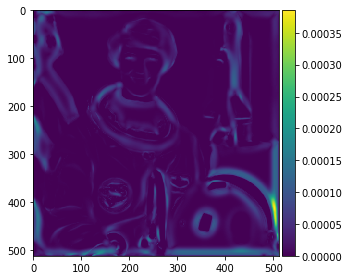

In [ ]:
io.imshow(filters.frangi(astronaut))

- [`hessian`](https://scikit-image.org/docs/stable/api/skimage.filters.html#hessian):

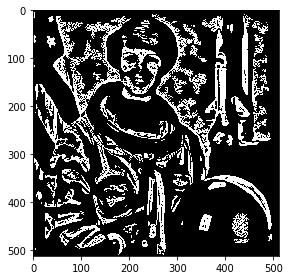

In [ ]:
io.imshow(filters.hessian(astronaut))

**Ejercicio:** observa que la mayoría de filtros incorporan una máscara. ¿Puedes aplicarla?

# Transformaciones

El módulo [`skimage.transform`](https://scikit-image.org/docs/stable/api/skimage.transform.html) contiene diferentes algoritmos de trasformación de imágenes. El objetivo de las trasformaciones es muy similar al de los filtros: generar una nueva imágen en la que sea más sencillo recuperar la información. La diferencia entre filtro y transformación es, por tanto, semántica.

In [ ]:
from skimage import transform

[`rotate`](https://scikit-image.org/docs/stable/api/skimage.transform.html#rotate) nos permite girar las imágenes:

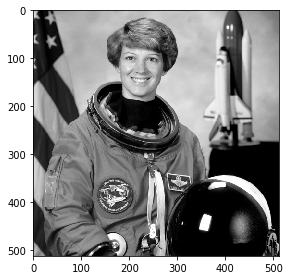

In [ ]:
angle = 0  #@param {type:"slider", min:0, max:359}
io.imshow(transform.rotate(astronaut,angle=angle))


[`resize`](https://scikit-image.org/docs/stable/api/skimage.transform.html#resize) nos permite redimensionar una imagen pudiendo cambiar el ratio de alto y ancho:


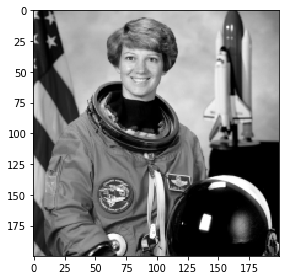

In [ ]:
h = 200  #@param {type:"slider", min:1, max:500}
w = 200  #@param {type:"slider", min:1, max:500}
io.imshow(transform.resize(astronaut,output_shape=(h,w)))


[`rescale`](https://scikit-image.org/docs/stable/api/skimage.transform.html#rescale) nos permite re-escalar una imagen conservando el ratio de alto y ancho. Por lo general, este método se usa para reducir el tamaño de una imagen, lo cual ayuda a eliminar información superflua de la misma, y facilita la obtenición de la información esencial que contiene.


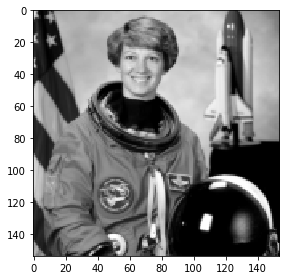

In [ ]:
scale = 0.3  #@param {type:"slider", min:0.1, max:10, step:0.1}
io.imshow(transform.rescale(astronaut,scale=scale))

El reescalado de imágenes no es único y existen otros métodos como [`pyramid_reduce`](https://scikit-image.org/docs/stable/api/skimage.transform.html#pyramid_reduce) que prometen una reducción más certera de la imagen original

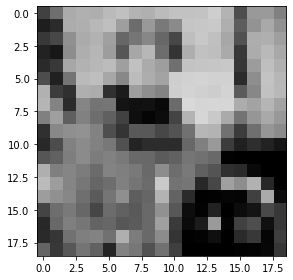

In [ ]:
downscale = 28  #@param {type:"slider", min:1, max:100}
io.imshow(transform.pyramid_reduce(astronaut,downscale=downscale))

Incluso permiten reconstruir la imagen (o al menos lo intentan):

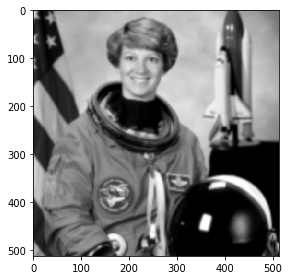

In [ ]:
scale = 3  #@param {type:"slider", min:1, max:100}
reduced = transform.pyramid_reduce(astronaut,downscale=scale)
io.imshow(transform.pyramid_expand(reduced,upscale=scale))

Otro tipo de transformaciones que podemos aplicar a la imagen es una proyección de la misma. Una de ellas es las transformación *radon* de la que puedes encontrar más información [aquí](https://scikit-image.org/docs/stable/auto_examples/transform/plot_radon_transform.html#sphx-glr-auto-examples-transform-plot-radon-transform-py).

Visualmente, no obtenemos mucha información de esta transformación:

/usr/local/lib/python3.6/dist-packages/skimage/transform/radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


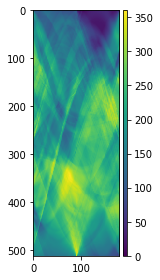

In [ ]:
radon = transform.radon(astronaut)
io.imshow(radon)

Pero si desacemos la transformación vemos que se recupera buena parte de la información de la fotografía original:

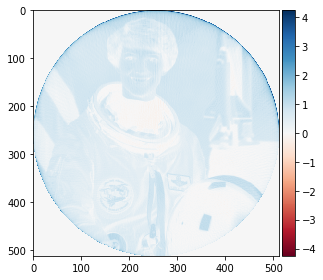

In [ ]:
io.imshow(transform.iradon(radon))

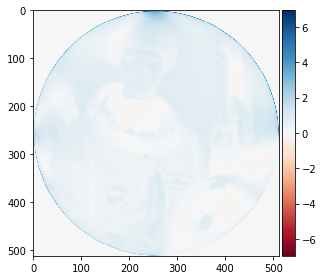

In [ ]:
io.imshow(transform.iradon_sart(radon))


Lo que quiere decir que decir que la transformación contiene una representación de bajo nivel del contenido (información) de la imagen.

## scikit-image.io

El módulo [`skimage.io`](https://scikit-image.org/docs/stable/api/skimage.io.html), que hemos estado utilizando para pintar las imágenes, contiene diversas herramientas para leer y escribir imágenes en disco.

# Ejercicio final

Preprocesa las imágenes diponibles en el siguiente conjunto de datos: [flower-color-images](https://www.kaggle.com/olgabelitskaya/flower-color-images)

<hr>

Creado por **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">